## 1. Quadratic equation mistakes

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math

# a, b, c = map(int, input('Pass a, b, c: ').split(' '))

def calc_solutions(a, b, c):

    delta = b*b - 4*a*c
    
    if delta < 0:
        print("delta can't be < 0 !")
    
    x1 = (-b - math.sqrt(delta)) / (2*a)
    x2 = (-b + math.sqrt(delta)) / (2*a)

    print(f'For a={a}, b={b}, c={c}\n')
    print(f'First solution: {x1}')
    print(f'Second solution: {x2}')
    print('---------------------- \n')
    return x1, x2


a = 5e-20
b = 10 ** 22
c = 15e-20

x1, x2 = calc_solutions(a, b, c)

print(f'x1 in equation: {a * x1**2 + b * x1 + c}')
print(f'x2 in equation: {a * x2**2 + b * x2 + c}\n')
print('---------------------- \n')


calc_solutions(1.0, 10**9, 1.0)

calc_solutions(1.0, 1.0, 1e-10)


For a=5e-20, b=10000000000000000000000, c=1.5e-19

First solution: -2e+41
Second solution: 0.0
---------------------- 

x1 in equation: -3.6537540933272573e+47
x2 in equation: 1.5e-19

For a=1.0, b=1000000000, c=1.0

First solution: -1000000000.0
Second solution: 0.0
---------------------- 

For a=1.0, b=1.0, c=1e-10

First solution: -0.9999999999
Second solution: -1.000000082740371e-10
---------------------- 



(-0.9999999999, -1.000000082740371e-10)

In [ ]:
# create 1000 equally spaced points between -n and n
n = 10**50
x = np.linspace(-n, n, 1000)
y = a * x**2 + b*x + c

fig, ax = plt.subplots()
ax.plot(x, y)
ax.grid(True, which='both')


## 2. Sequences

1-th: 0.2000000000000000
2-th: 0.0400000000000000
3-th: 0.0080000000000002
5-th: 0.0003200000000044
10-th: 0.0000001024136203
15-th: 0.0000000425962755
20-th: 0.0001330109609581
30-th: 1298.9351655043119536
35-th: 4059172.3922009752131999


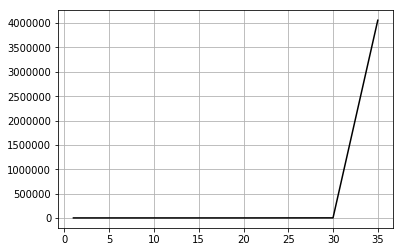

Took: 0:00:04.868681


In [3]:

def with_time_measure(func):
    def new_func(*args, **kwargs):
        from datetime import datetime
        prev = datetime.now()
        func(*args, **kwargs)
        now = datetime.now()
        print(f'Took: {now - prev}')
    return new_func


@with_time_measure
def output_results(func, iterable):
    results = []
    for n in iterable:
        res = func(n)
        results.append(res)
        print(f'{n}-th: {res:.16f}')

    plt.plot(list(iterable), results, 'k')
    plt.grid(True)
    plt.show()
    


def recSeq(x0, x1):
    def _inner(n):
        if (n == 0):
            return x0
        elif (n == 1):
            return x1

        return 26/5 * _inner(n-1) - _inner(n-2)
    return _inner

x0 = 1
x1 = 1/5

seq = recSeq(x0, x1)
output_results(seq, [1, 2, 3, 5, 10, 15, 20, 30, 35])



## 3. Series

Pi: 3.141592653589793

1-th: 0.2463545583516975
2-th: 0.1245208365179753
3-th: 0.0831898876624599
5-th: 0.0499688469219532
10-th: 0.0249960967959599
20-th: 0.0124995118140721
30-th: 0.0083331886699631
50-th: 0.0049999687509770
100-th: 0.0024999960937788
200-th: 0.0012499995117174
500-th: 0.0004999999687518
1000-th: 0.0002499999960888
10000-th: 0.0000249999999946
100000-th: 0.0000025000000492


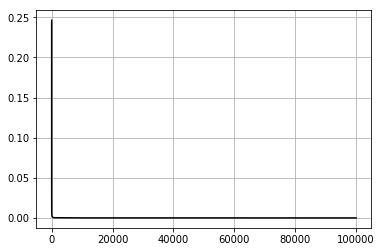

Took: 0:00:00.296142


Plot of error rate in range 100 - 1500


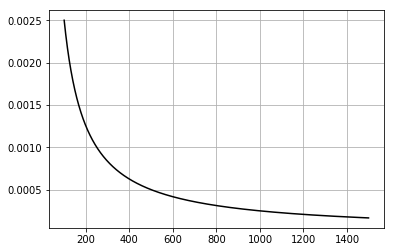

In [8]:
from functools import reduce

def pi_series(n):
    n = n*4
    calc_nth = lambda k: (-1)**k / (2*k + 1)
    res = 4 * sum((calc_nth(k) for k in range(n)))
    return abs(res - math.pi)


print(f'Pi: {math.pi}\n')

expected_k = round((4*10**7 - 3) / 2) + 1

desired_error = 10**-7

xs = list(map(round, [
    1, 2, 3, 5, 10, 20, 30, 50,
    100, 200, 500,
    10**3, 10**4, 10**5,
    expected_k - 10**5*5,
    expected_k,
    expected_k + 10**5*5,
]))

output_results(pi_series, xs)

print(f'\nIs error({expected_k - 1000}) < 10**7 ?')
print(pi_series(expected_k) <= desired_error)

print(f'\nIs error({expected_k}) < 10**7 ?')
print(pi_series(expected_k) <= desired_error)

print(f'\nIs error({expected_k + 1}) < 10**7 ?')
print(pi_series(expected_k + 1) <= desired_error)

print(f'\nIs error({expected_k + 2}) < 10**7 ?')
print(pi_series(expected_k + 2) <= desired_error)

points = range(100, 1500)
ys = [pi_series(x) for x in points]

print('\n\nPlot of error rate in range 100 - 1500')
plt.plot(points, ys, 'k')
plt.grid(True)
plt.show()



## 5. Fast logarithm calculation


From library:

2-th: 0.6931471805599453
3-th: 1.0986122886681098
4-th: 1.3862943611198906
5-th: 1.6094379124341003
7-th: 1.9459101490553132
10-th: 2.3025850929940459
15-th: 2.7080502011022101
20-th: 2.9957322735539909
25-th: 3.2188758248682006
30-th: 3.4011973816621555
40-th: 3.6888794541139363
50-th: 3.9120230054281460
70-th: 4.2484952420493594
80-th: 4.3820266346738812
100-th: 4.6051701859880918
200-th: 5.2983173665480363


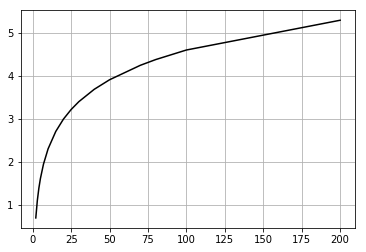

Took: 0:00:00.119916

My version:
 
2-th: 0.6931471805599454
3-th: 1.0986122886681098
4-th: 1.3862943611198904
5-th: 1.6094379125702614
7-th: 1.9459101490553135
10-th: 2.3025850929940459
15-th: 2.7080502011022105
20-th: 2.9957322735539913
25-th: 3.2188758248682010
30-th: 3.4011973816621559
40-th: 3.6910247918562731
50-th: 3.9120230054281464
70-th: 4.2484952420493594
80-th: 4.3820266346738821
100-th: 4.6051701860416348
200-th: 5.2983173665480372


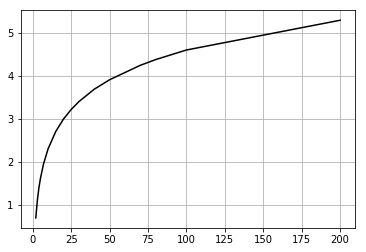

Took: 0:00:00.113401


In [5]:
ln_builtin = lambda x: math.log(x, math.e)


def _calc_ln(x, n):
    calc_nth = lambda k: (-1)**(k-1) * (x-1)**k / k
    return sum((calc_nth(k) for k in range(1, n)))


def ln(n):
    def _inner(x):
        if x >= 2:
            return 1 + ln(n)(x/math.e)
        return _calc_ln(x, n)
    return _inner


xs = [2, 3, 4, 5, 7, 10, 15, 20, 25, 30, 40, 50, 70, 80, 100, 200]

print('\nFrom library:\n')
output_results(ln_builtin, xs)

print('\nMy version:\n ')
output_results(ln(100), xs)


## 6. Arctg algorithm
### Having only arctg (x) where |x| < 1

In [ ]:
arctg = (lambda x: math.atan(x)
         if abs(x) <= 1
         else np.sign(x) * math.pi/2 - arctg(1/x))

output_results(lambda x: math.atan(x) + math.atan(1/x), range(1, 1000))

# print('\nFrom library:\n')
# output_results(math.atan, xs)

# print('\nMy version:\n ')
# output_results(arctg, xs)

## 8. Derivative

In [ ]:
derivative1 = lambda f, x, h: (f(x + h) - f(x)) / h

derivative2 = lambda f, x, h: (f(x + h) - f(x - h)) / 2*h

func = lambda x: math.e ** (2*x)

hs = list(map(lambda x: 2**-x, range(25, 26)))

x = 0.5


def output_derivative(derivative, name):
    print(f'\n\n{name}: \n')
    results = list(map(lambda h: derivative(func, x, h), hs))

    for i, res in enumerate(results):
        print(f'{i+1}-th: {res:.16f}')

    plt.plot(range(len(hs)), results, 'k')
    plt.grid(True)
    plt.show()


output_derivative(derivative1, 'derivative1')
output_derivative(derivative2, 'derivative2')
